# Group 30
Yuke Liu

Curtis Krawczyk

Ryan Harty

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


 #Q1

In [2]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)
df["RESTAURANT"] = df["DBA"]+" "+df["BUILDING"]+" "+df["STREET"]+" "+df["ZIPCODE"]+" "+df["BORO"]
df["RESTAURANT"][:10]
df

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5,5,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6,6,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7,7,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8,8,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9,9,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369,7183350505,American,11/15/2014,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,38,Z,11/15/2014,02/12/2015,Cycle Inspection / Re-inspection,BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...


#Q2

In [3]:
df_dedup = df.drop_duplicates(subset='RESTAURANT')
len(df_dedup)

10114

#Q3

In [4]:
Count_DBA = df_dedup["DBA"].value_counts()
len(Count_DBA[(Count_DBA>1)])

368

#Q4

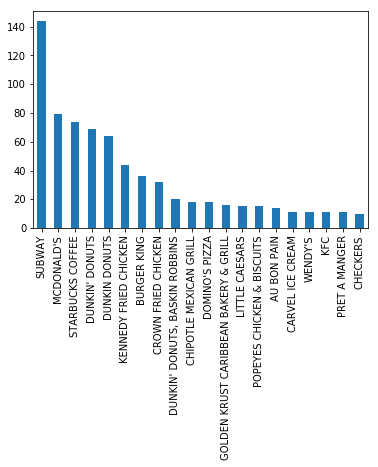

In [5]:
Count_DBA[:20].plot(kind='bar')

#Q5

In [6]:
fraction = float(sum(Count_DBA[(Count_DBA>1)]))/len(df_dedup)
fraction

0.16472216729286138

#Q6 solution1

In [21]:
Nonchain_restaurant = Count_DBA[(Count_DBA<=1)]
DBA_BORO = df_dedup[["DBA","BORO"]]
Nonchain_restaurant_list = Nonchain_restaurant.index.tolist()
def is_Nonchain_restaurant(x):
    return x in Nonchain_restaurant_list
Mask_Nonchain_restaurant_BORO = DBA_BORO["DBA"].map(is_Nonchain_restaurant)
Nonchain_restaurant_BORO = DBA_BORO[Mask_Nonchain_restaurant_BORO]
mask=(Nonchain_restaurant_BORO["BORO"]=="Missing")
Nonchain_restaurant_BORO.loc[mask,"BORO"] = np.nan 
Nonchain_restaurant_BORO["BORO"].value_counts()
#Nonchain_restaurant_BORO["BORO"].value_counts().plot(kind='bar')

C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


MANHATTAN        3323
BROOKLYN         2180
QUEENS           1968
BRONX             659
STATEN ISLAND     312
Name: BORO, dtype: int64

#Q7

C:\Users\19785\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


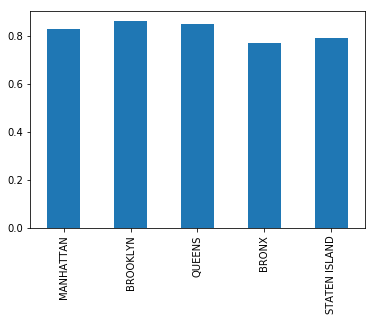

In [9]:
mask=(df_dedup["BORO"]=="Missing")
df_dedup.loc[mask,"BORO"] = np.nan 
fraction_Nonchain_restaurant_BORO = Nonchain_restaurant_BORO["BORO"].value_counts()/df_dedup["BORO"].value_counts()
fraction_Nonchain_restaurant_BORO.plot(kind='bar')

#Q8

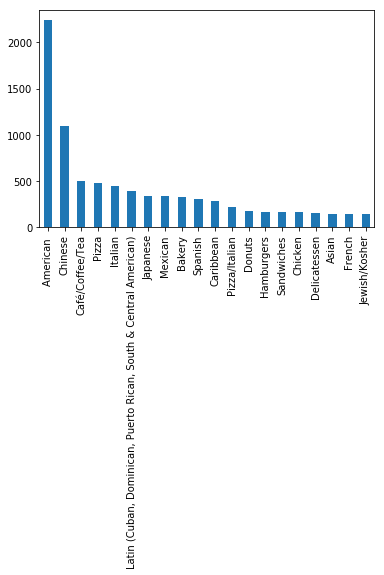

In [10]:
Cruisine_DBA = df[["RESTAURANT","CUISINE DESCRIPTION"]].drop_duplicates()
num_restaurant_Cuisine = Cruisine_DBA['CUISINE DESCRIPTION'].value_counts()
num_restaurant_Cuisine[:20].plot(kind='bar')
#num_restaurant_Cuisine

#Q9

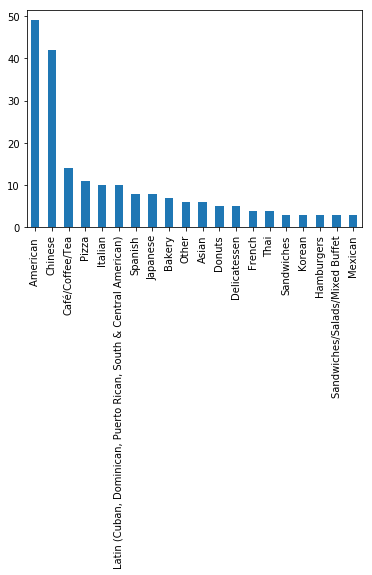

In [12]:
new_df = df.drop_duplicates(subset=["VIOLATION CODE","RESTAURANT"])
mask1 = (new_df["RESTAURANT"].value_counts() == 1)
mask1 = mask1[mask1 == True]
mask1.index.values
mask2 =(new_df["VIOLATION CODE"].isnull())
no_violation= new_df[mask2]
clean_restaurant_mask =no_violation["RESTAURANT"].isin(mask1.index)
count_NonViolation1 = no_violation[clean_restaurant_mask]["CUISINE DESCRIPTION"].value_counts()
count_NonViolation1[:20].plot(kind="bar")
# clean_Rest = new_df[mask1]
# clean_Rest
# mask = mask[mask == True]
# mask.index.values
# clean_restaurant =new_df["RESTAURANT"].isin(mask.index.values)
# clean_restaurant

#Q10

In [13]:
df_clean = df[["CUISINE DESCRIPTION","RESTAURANT"]].drop_duplicates()
mask_q10 = (df_clean["CUISINE DESCRIPTION"].value_counts() >= 20)
mask_q10 = mask_q10[mask_q10 == True]
#mask_q10.index.values
Selected_Cuisine_Ratio = Series(count_NonViolation1/num_restaurant_Cuisine,index=mask_q10.index.values)
Selected_Cuisine_Ratio.sort_values(ascending=False)[:10]

Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Soups & Sandwiches               0.047619
Barbecue                         0.047619
Continental                      0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64

#Q11

In [14]:
VIOLATION_BORO = pd.crosstab(df["VIOLATION DESCRIPTION"],df["BORO"],margins=False)
VIOLATION_BORO = VIOLATION_BORO.drop(columns = ['Missing'])
VIOLATION_BORO.idxmax()
#VIOLATION_BORO

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

#Q12

In [15]:
violationFrequency = VIOLATION_BORO.T.sum()
violationFrequency = VIOLATION_BORO.T/violationFrequency
# violationFrequency
#violationFrequency.T
violationFrequency.T.idxmax()
#violationFrequency

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

#Q13

In [16]:
Phone_Zipcde = df[["PHONE","ZIPCODE"]].drop_duplicates()
Phone_Zipcde
def first_three_digits(x):
    return x[:3]
first_three_digits=Phone_Zipcde["PHONE"].apply(first_three_digits)
Phone_Zipcde['Area_Codes']=first_three_digits
mask = (Phone_Zipcde['Area_Codes'].value_counts()==1)
mask = mask[mask == True]
len(mask)

34

#Q14

In [17]:
def last_word(x):
    return x.split(" ")[-1]
street_type = df["STREET"].apply(last_word)
df["STREET TYPE"] = street_type

def except_last_word(x):
    base_part =x.split(" ")[:-1]
    return " ".join(base_part)

street_base = df["STREET"].apply(except_last_word)
df["STREET BASE"] = street_base

df["STREET BASE & ZIP"] = df["STREET BASE"]+ " "+df["ZIPCODE"]
df

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,...,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT,STREET TYPE,STREET BASE,STREET BASE & ZIP
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,AVENUE,FLATBUSH,FLATBUSH 11225
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,AVENUE,FLATBUSH,FLATBUSH 11225
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,AVENUE,FLATBUSH,FLATBUSH 11225
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,AVENUE,FLATBUSH,FLATBUSH 11225
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,AVENUE,FLATBUSH,FLATBUSH 11225
5,5,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS,ROAD,63,63 11374
6,6,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS,ROAD,63,63 11374
7,7,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS,ROAD,63,63 11374
8,8,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,Not Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS,ROAD,63,63 11374
9,9,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369,7183350505,American,11/15/2014,...,Critical,38,Z,11/15/2014,02/12/2015,Cycle Inspection / Re-inspection,BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...,BOULEVARD,ASTORIA,ASTORIA 11369


In [22]:
mask = (df["STREET BASE"]== "")
df[mask]=np.nan
data = df[["STREET TYPE", "STREET BASE", "STREET BASE & ZIP"]]
data_clean = data.drop_duplicates(subset=['STREET BASE',"STREET TYPE","STREET BASE & ZIP"])
data_clean1 = data_clean.dropna()
# data_clean = data_clean.drop_duplicates(subset)
data_clean1[:10]

,STREET TYPE,STREET BASE,STREET BASE & ZIP
0,AVENUE,FLATBUSH,FLATBUSH 11225
5,ROAD,63,63 11374
9,BOULEVARD,ASTORIA,ASTORIA 11369
16,AVENUE,SUTTER,SUTTER 11208
22,HIGHWAY,KINGS,KINGS 11223
24,AVENUE,CHURCH,CHURCH 11218
26,AVENUE,3,3 11209
30,STREET,EAST 74,EAST 74 10021
31,WEST,PROSPECT PARK,PROSPECT PARK 11215
41,AVENUE,COLUMBUS,COLUMBUS 10025


In [23]:
merged = data_clean1.merge(data_clean1,
                          left_on = 'STREET BASE & ZIP',
                          right_on = 'STREET BASE & ZIP',
                          suffixes = (['_1', '_2']))

mask = (merged['STREET TYPE_1'] != merged['STREET TYPE_2'])

distinct = merged[mask]
distinct[:10]

,STREET TYPE_1,STREET BASE_1,STREET BASE & ZIP,STREET TYPE_2,STREET BASE_2
2,ROAD,63,63 11374,DRIVE,63
3,DRIVE,63,63 11374,ROAD,63
9,AVENUE,CHURCH,CHURCH 11218,AVE,CHURCH
10,AVE,CHURCH,CHURCH 11218,AVENUE,CHURCH
15,WEST,PROSPECT PARK,PROSPECT PARK 11215,W,PROSPECT PARK
16,W,PROSPECT PARK,PROSPECT PARK 11215,WEST,PROSPECT PARK
19,AVENUE,COLUMBUS,COLUMBUS 10025,AVE,COLUMBUS
20,AVE,COLUMBUS,COLUMBUS 10025,AVENUE,COLUMBUS
23,STREET,COURT,COURT 11201,ST,COURT
24,ST,COURT,COURT 11201,STREET,COURT


In [20]:
cross = pd.crosstab(distinct['STREET TYPE_1'], distinct['STREET TYPE_2'])
cross
cross[['AVE', 'ST', 'RD', 'PL', 'BOULEARD', 'BULEVARD']].idxmax()

STREET TYPE_2
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object